In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 114.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LvlPSWWbOmo7QT8iziW9")
project = rf.workspace("bharani-1ucid").project("south-indian-food-detection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to south-indian-food-detection-3 in yolov8:: 100%|██████████| 2008/2008 [00:00<00:00, 4766.87it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
!ls -d */

drive/	sample_data/  south-indian-food-detection-3/


In [7]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(
    data='/content/south-indian-food-detection-3/data.yaml',
    epochs=25,
    imgsz=640,
    batch=16,
    project='/content/drive/MyDrive/FoodProject',
    name='south_indian_model'
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/south-indian-food-detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=south_indian_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

In [18]:
import os

# Check if the file exists in your Drive
model_path = '/content/drive/MyDrive/FoodProject/south_indian_model/weights/best.pt'

if os.path.exists(model_path):
    print("SUCCESS")
else:
    print("WARNING: Model not found.")

SUCCESS



image 1/1 /content/south-indian-food-detection-3/test/images/images-8-_jpeg.rf.47090e13c93722bff9d9f961d49bc6a4.jpg: 640x640 1 paal kolukattai, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict10


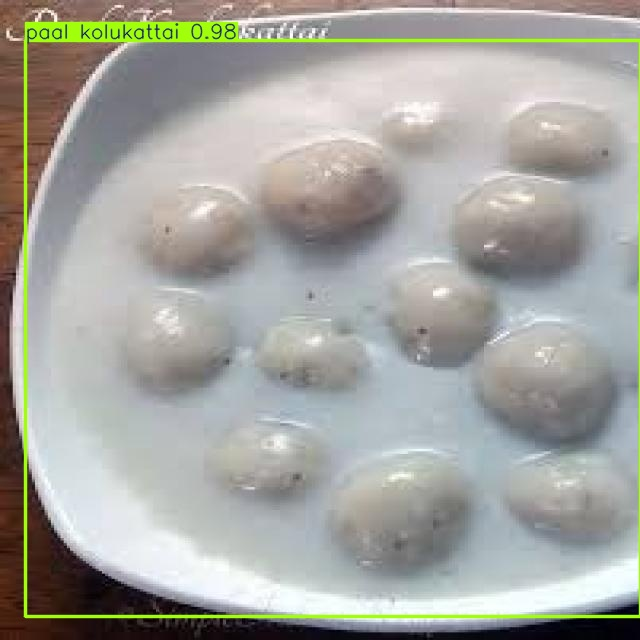

In [19]:
from ultralytics import YOLO
import glob
import random
from IPython.display import Image, display

# Load weights from Drive
model = YOLO('/content/drive/MyDrive/FoodProject/south_indian_model/weights/best.pt')

# Get random test image
test_images = glob.glob('/content/south-indian-food-detection-3/test/images/*.jpg')
if test_images:
    random_image = random.choice(test_images)
    results = model.predict(source=random_image, conf=0.25, save=True)
    display(Image(filename=results[0].save_dir + '/' + random_image.split('/')[-1]))

In [6]:
# Validate the model on the validation set
metrics = model.val()

# Print the key scores
print(f"mAP50 (General Accuracy): {metrics.box.map50}")
print(f"mAP50-95 (Strict Accuracy): {metrics.box.map}")

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1267.7±352.5 MB/s, size: 56.5 KB)
val: Scanning /content/south-indian-food-detection-3/valid/labels... 83 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 83/83 902.8it/s 0.1s
val: New cache created: /content/south-indian-food-detection-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 124, len(boxes) = 125. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.6it/s 3.8s
                   all         83        125      0.353       0.56      0.526        0.4
               appalam          3          3      0.223      0.298       0.17     0.0547
                banana         

In [20]:
from ultralytics import YOLO

model_path = '/content/drive/MyDrive/FoodProject/south_indian_model/weights/best.pt'
model = YOLO(model_path)
class_dict = model.names
with open('classes.txt', 'w') as f:
    for id, name in class_dict.items():
        f.write(f"{id}: {name}\n")
        print(f"{id}: {name}") # Print names

print("\n SUCCESS")

0: appalam
1: appam
2: banana
3: boiled egg
4: butter milk
5: channa masala
6: chicken 65
7: dosa
8: gravy
9: idiyappam
10: idly
11: kaara chutney
12: kesari
13: koozh
14: kuruma
15: masiyal
16: medu vadai
17: moor kolambu
18: mushroom briyani
19: paal kolukattai
20: paneer briyani
21: paniyaram
22: parupu vadai
23: payasam
24: pickle
25: pidi kolukattai
26: podi
27: pongal
28: poori
29: poorna kolukattai
30: pulisatham
31: puthina chutney
32: raita
33: rasam
34: salad
35: sambar
36: satham
37: soup
38: tea
39: thayir
40: thengai chutney
41: thovaiyal
42: uthapam

 SUCCESS
